In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv('https://datapolitan-training-files.s3.amazonaws.com/20200506_Police_Incidents.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (52,57,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
df.head()

,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,...,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
0,031359-2020,2020,031359-2020-01,2,58 - ROUTINE INVESTIGATION,"THEFT OF PROP > OR EQUAL $2,500 <$30K (NOT SHO...",Single Family Residence - Occupied,NaN,6506 PEMBERTON DR,NaN,...,23H,A,Coded,2020-02-26 14:45:48.0000000,2.492434e+06,7.011514e+06,75230.0,DALLAS,TX,"6506 PEMBERTON DR\nDALLAS, TX 75230\n(32.89150..."
1,064876-2020,2020,064876-2020-01,2,6X - MAJOR DIST (VIOLENCE),CRIMINAL TRESPASS WARNING,Hotel/Motel/ETC,NaN,10835 COMPOSITE DR,410,...,999,C,999 - No Coded,2020-04-12 12:16:01.0000000,2.460671e+06,7.005910e+06,75220.0,DALLAS,TX,"10835 COMPOSITE DR\nDALLAS, TX 75220\n(32.8774..."
2,020512-2020,2020,020512-2020-01,2,PSE/09 - THEFT,"THEFT OF PROP > OR EQUAL $750 <$2,500 (NOT SHO...",Apartment Residence,None,9110 SOUTHWESTERN BLVD,4300,...,23H,A,Coded,2020-04-24 13:00:01.0000000,2.504918e+06,6.998741e+06,75214.0,DALLAS,TX,"9110 SOUTHWESTERN BLVD\nDALLAS, TX 75214\n(32...."
3,805157-2019,2019,805157-2019-01,1,NaN,LOST PROPERTY (NO OFFENSE),Bank/Savings And Loan,NaN,4771 SATURN RD,NaN,...,999,C,999 - No Coded,2019-11-07 19:13:16.0000000,2.536648e+06,7.000784e+06,75041.0,GARLAND,TX,"4771 SATURN RD\nGARLAND, TX 75041\n(32.861041,..."
4,268491-2016,2016,268491-2016-01,1,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,"Highway, Street, Alley ETC",NaN,3112 STATE ST,E,...,NaN,NaN,NaN,2016-11-14 05:41:23.0000000,2.492080e+06,6.977853e+06,75204.0,DALLAS,TX,"3112 STATE ST\nDALLAS, TX 75204\n(32.799547, -..."


In [20]:
df.shape

(407750, 100)

In [21]:
df.columns

Index(['Incident Number w/year', 'Year of Incident', 'Service Number ID',
       'Watch', 'Call (911) Problem', 'Type of Incident', 'Type  Location',
       'Type of Property', 'Incident Address', 'Apartment Number',
       'Reporting Area', 'Beat', 'Division', 'Sector', 'Council District',
       'Target Area Action Grids', 'Community', 'Date1 of Occurrence',
       'Year1 of Occurrence', 'Month1 of Occurence', 'Day1 of the Week',
       'Time1 of Occurrence', 'Day1 of the Year', 'Date2 of Occurrence ',
       'Year2 of Occurrence', 'Month2 of Occurence', 'Day2 of the Week',
       'Time2 of Occurrence', 'Day2 of the Year', 'Date of Report',
       'Date incident created', 'Offense Entered Year',
       'Offense Entered Month', 'Offense Entered Day of the Week',
       'Offense Entered Time', 'Offense Entered  Date/Time', 'CFS Number',
       'Call Received Date Time', 'Call Date Time', 'Call Cleared Date Time',
       'Call Dispatch Date Time', 'Special Report (Pre-RMS)',
       'Per

In [70]:
df.count()

Incident Number w/year    407750
Year of Incident          407750
Service Number ID         407750
Watch                     407750
Call (911) Problem        394355
                           ...  
Y Cordinate               406824
Zip Code                  406870
City                      405402
State                     403853
Location1                 407021
Length: 100, dtype: int64

In [89]:
df['Offense Entered Year'].count()

407750

## Check the timeframe

In [22]:
date_cols = ['Year of Incident',\
             'Date1 of Occurrence','Time1 of Occurrence',\
             'Date2 of Occurrence ','Time2 of Occurrence',\
             'Date of Report','Date incident created',\
             'Offense Entered Year','Offense Entered Month', 'Offense Entered Day of the Week',\
             'Offense Entered Time', 'Offense Entered  Date/Time',\
             'Call Received Date Time','Call Date Time', 'Call Cleared Date Time','Call Dispatch Date Time']

In [23]:
df_date = df[date_cols]

In [28]:
df_date.head()

,Year of Incident,Date1 of Occurrence,Time1 of Occurrence,Date2 of Occurrence,Time2 of Occurrence,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time
0,2020,2020-02-16 00:00:00.0000000,08:00,2020-02-16 00:00:00.0000000,08:45,2020-02-16 08:59:00.0000000,2020-02-16 09:05:42.0000000,2020,February,Sun,09:05,47,2020-02-16 08:59:52.0000000,2020-02-16 08:59:52.0000000,2020-02-16 09:59:16.0000000,2020-02-16 08:59:53.0000000
1,2020,2020-04-09 00:00:00.0000000,11:50,2020-04-09 00:00:00.0000000,12:04,2020-04-09 12:04:00.0000000,2020-04-09 12:53:38.0000000,2020,April,Thu,12:53,100,2020-04-09 12:04:49.0000000,2020-04-09 12:04:49.0000000,2020-04-09 14:30:26.0000000,2020-04-09 12:11:03.0000000
2,2020,2020-01-29 00:00:00.0000000,13:00,2020-01-31 00:00:00.0000000,08:00,2020-01-31 09:45:00.0000000,2020-01-31 10:16:02.0000000,2020,January,Fri,10:16,31,2020-01-31 09:45:34.0000000,2020-01-31 09:45:34.0000000,2020-01-31 10:48:35.0000000,2020-01-31 09:49:20.0000000
3,2019,2019-11-04 00:00:00.0000000,13:05,2019-11-07 00:00:00.0000000,13:10,2019-11-07 18:16:39.0000000,2019-11-07 19:05:11.0000000,2019,November,Thu,19:05,311,NaN,NaN,NaN,NaN
4,2016,2016-11-09 00:00:00.0000000,00:30,2016-11-09 00:00:00.0000000,07:45,2016-11-09 10:00:00.0000000,2016-11-09 09:51:32.0000000,2016,November,Wed,09:51,314,2016-11-09 07:48:52.0000000,2016-11-09 07:48:51.0000000,2016-11-09 10:56:54.0000000,2016-11-09 09:33:19.0000000


**Min and Max Dates**

In [29]:
df_date['Date incident created'].max()

'2020-05-05 23:25:53.0000000'

In [30]:
df_date['Date incident created'].min()

'2014-06-01 02:34:43.0000000'

**Average incidents per day**

In [32]:
type(df_date['Date incident created'][0])

str

In [36]:
df_date['created_date_format'] = df_date['Date incident created'].apply(lambda x:pd.to_datetime(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_date.head()

,Year of Incident,Date1 of Occurrence,Time1 of Occurrence,Date2 of Occurrence,Time2 of Occurrence,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,created_date_format
0,2020,2020-02-16 00:00:00.0000000,08:00,2020-02-16 00:00:00.0000000,08:45,2020-02-16 08:59:00.0000000,2020-02-16 09:05:42.0000000,2020,February,Sun,09:05,47,2020-02-16 08:59:52.0000000,2020-02-16 08:59:52.0000000,2020-02-16 09:59:16.0000000,2020-02-16 08:59:53.0000000,2020-02-16 09:05:42
1,2020,2020-04-09 00:00:00.0000000,11:50,2020-04-09 00:00:00.0000000,12:04,2020-04-09 12:04:00.0000000,2020-04-09 12:53:38.0000000,2020,April,Thu,12:53,100,2020-04-09 12:04:49.0000000,2020-04-09 12:04:49.0000000,2020-04-09 14:30:26.0000000,2020-04-09 12:11:03.0000000,2020-04-09 12:53:38
2,2020,2020-01-29 00:00:00.0000000,13:00,2020-01-31 00:00:00.0000000,08:00,2020-01-31 09:45:00.0000000,2020-01-31 10:16:02.0000000,2020,January,Fri,10:16,31,2020-01-31 09:45:34.0000000,2020-01-31 09:45:34.0000000,2020-01-31 10:48:35.0000000,2020-01-31 09:49:20.0000000,2020-01-31 10:16:02
3,2019,2019-11-04 00:00:00.0000000,13:05,2019-11-07 00:00:00.0000000,13:10,2019-11-07 18:16:39.0000000,2019-11-07 19:05:11.0000000,2019,November,Thu,19:05,311,NaN,NaN,NaN,NaN,2019-11-07 19:05:11
4,2016,2016-11-09 00:00:00.0000000,00:30,2016-11-09 00:00:00.0000000,07:45,2016-11-09 10:00:00.0000000,2016-11-09 09:51:32.0000000,2016,November,Wed,09:51,314,2016-11-09 07:48:52.0000000,2016-11-09 07:48:51.0000000,2016-11-09 10:56:54.0000000,2016-11-09 09:33:19.0000000,2016-11-09 09:51:32


Text(0, 0.5, 'Number of Incidents Created in RMS')

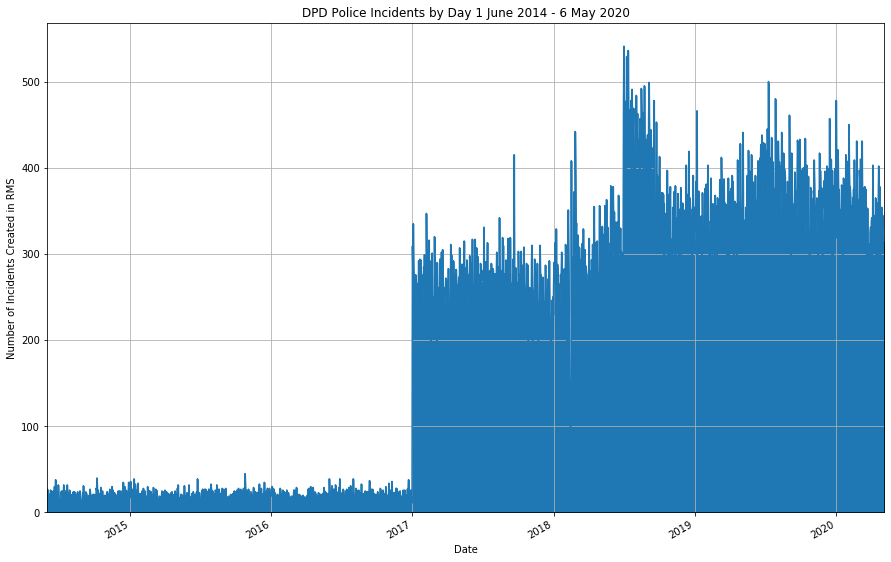

In [52]:
ax = df_date.groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count()\
.plot(kind='area',figsize=(15,10),grid=True,title='DPD Police Incidents by Day 1 June 2014 - 6 May 2020')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Incidents Created in RMS')

In [54]:
df_date.groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count().mean()

188.51132686084142

In [55]:
#2017 to 2020
df_date[df_date['created_date_format']>='2017-01-01T00:00:00'].groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count().mean()

319.40147783251234

Text(0, 0.5, 'Number of Incidents Created in RMS')

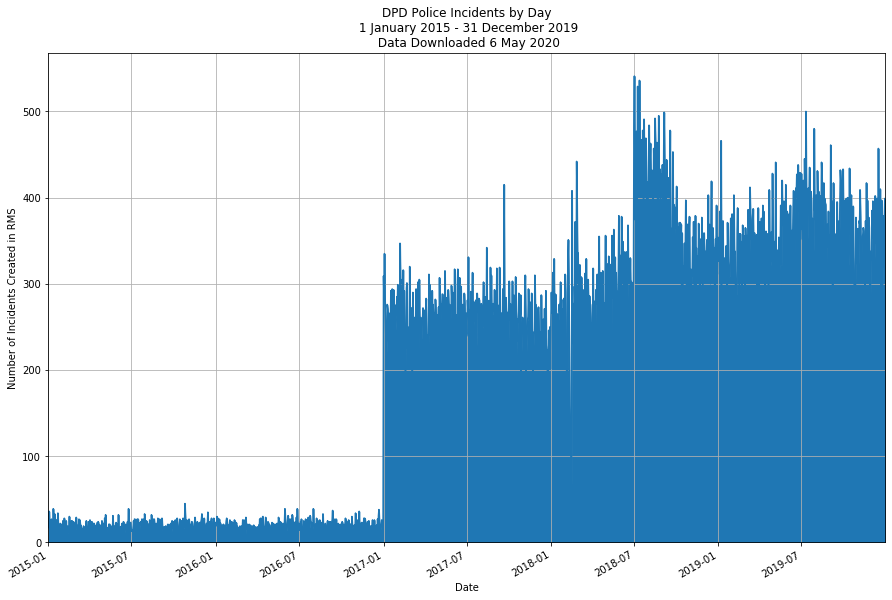

In [58]:
ax = df_date[(df_date['created_date_format']>='2015-01-01T00:00:00')&(df_date['created_date_format']<='2019-12-31T23:59:59')].groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count()\
.plot(kind='area',figsize=(15,10),grid=True,title='DPD Police Incidents by Day\n 1 January 2015 - 31 December 2019\n Data Downloaded 6 May 2020')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Incidents Created in RMS')

In [60]:
## Count of difference
df_date[(df_date['created_date_format']>='2015-01-01T00:00:00')&(df_date['created_date_format']<='2019-12-31T23:59:59')].count()

Year of Incident                   359577
Date1 of Occurrence                359577
Time1 of Occurrence                359577
Date2 of Occurrence                359577
Time2 of Occurrence                359577
Date of Report                     359577
Date incident created              359577
Offense Entered Year               359577
Offense Entered Month              359577
Offense Entered Day of the Week    359577
Offense Entered Time               359577
Offense Entered  Date/Time         359577
Call Received Date Time            351279
Call Date Time                     351279
Call Cleared Date Time             351096
Call Dispatch Date Time            351228
created_date_format                359577
dtype: int64

In [35]:
pd.to_datetime(df_date['Date incident created'][0])

Timestamp('2020-02-16 09:05:42')

In [61]:
## export Series of date counts for comparison
df_date_ct = df_date.groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count()

In [66]:
df_date_ct.to_pickle('data/20200506_df_date_ct.p')

## Explore the Crime Categories

In [90]:
crime_cat_cols = ['Service Number ID','Date incident created','RMS Code', 'Criminal Justice Information Service Code', 'Penal Code',
       'UCR Offense Name', 'UCR Offense Description', ' UCR Code',
       'Offense Type', 'NIBRS Crime', 'NIBRS Crime Category',
       'NIBRS Crime Against', 'NIBRS Code', 'NIBRS Group', 'NIBRS Type']

In [91]:
df_crime_cat = df[crime_cat_cols]

In [94]:
df_crime_cat['created_date_format'] = df_crime_cat['Date incident created'].apply(lambda x:pd.to_datetime(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
df_crime_cat.head()

,Service Number ID,Date incident created,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,created_date_format
0,031359-2020-01,2020-02-16 09:05:42.0000000,FS-23990194-F194,23990194,PC 31.03(e)(4)(A),NaN,NaN,NaN,NaN,ALL OTHER LARCENY,LARCENY/ THEFT OFFENSES,PROPERTY,23H,A,Coded,2020-02-16 09:05:42
1,064876-2020-01,2020-04-09 12:53:38.0000000,NA-99999999-MSC11,99999999,No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2020-04-09 12:53:38
2,020512-2020-01,2020-01-31 10:16:02.0000000,MA-23990193-F189,23990193,PC 31.03(e)(3),NaN,NaN,NaN,NaN,ALL OTHER LARCENY,LARCENY/ THEFT OFFENSES,PROPERTY,23H,A,Coded,2020-01-31 10:16:02
3,805157-2019-01,2019-11-07 19:05:11.0000000,NA-99999999-X1,99999999,No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2019-11-07 19:05:11
4,268491-2016-01,2016-11-09 09:51:32.0000000,FS-24110003-G1,24110003,PC 31.07,UUMV,AUTO THEFT - UUMV,710.0,PART1,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-09 09:51:32


**Find the NIBRS Switch**

In [97]:
# latest date for RMS records with no NIBRS crimed indicated
df_crime_cat[df_crime_cat['NIBRS Crime'].isnull()]['created_date_format'].max()

Timestamp('2018-02-11 02:29:23')

In [98]:
# earliest date for NIBRS codes to be in RMS
df_crime_cat[~df_crime_cat['NIBRS Crime'].isnull()]['created_date_format'].min()

Timestamp('2017-01-01 00:04:20')

**Find the UCR Switch Off**

In [114]:
# Earliest date for records appearing with null UCR codes
df_crime_cat[df_crime_cat[' UCR Code'].isnull()]['created_date_format'].min()

Timestamp('2017-04-15 20:44:57')

In [126]:
# Latest date UCR code not null
df_crime_cat[~df_crime_cat[' UCR Code'].isnull()]['created_date_format'].max()

Timestamp('2018-11-19 10:51:24')

**UCR Null and NIBRS Not Null**

In [115]:
df_crime_cat[(df_crime_cat[' UCR Code'].isnull()) & (~df_crime_cat['NIBRS Crime'].isnull())]['created_date_format'].min()

Timestamp('2017-04-15 20:44:57')

**UCR Not Null and NIBRS NULL**

In [116]:
df_crime_cat[(~df_crime_cat[' UCR Code'].isnull()) & (df_crime_cat['NIBRS Crime'].isnull())]\
['created_date_format'].max()

Timestamp('2018-02-11 02:29:23')

**UCR Not NULL and NIBRS NOT NULL**

In [119]:
df_crime_cat[(~df_crime_cat[' UCR Code'].isnull()) & (~df_crime_cat['NIBRS Crime'].isnull())]\
['created_date_format'].min()

Timestamp('2017-01-01 00:04:20')

In [125]:
df_crime_cat[df_crime_cat['created_date_format'] == df_crime_cat[(~df_crime_cat[' UCR Code'].isnull()) & (~df_crime_cat['NIBRS Crime'].isnull())]\
['created_date_format'].max()]

,Service Number ID,Date incident created,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,created_date_format
125196,250121-2018-01,2018-11-19 10:51:24.0000000,NA-99999999-X5,99999999,No Offense,FOUND,FOUND PROPERTY,2600.0,NOT CODED,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2018-11-19 10:51:24


In [123]:
df_crime_cat[(~df_crime_cat[' UCR Code'].isnull()) & (~df_crime_cat['NIBRS Crime'].isnull())].head()

,Service Number ID,Date incident created,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,created_date_format
5,103095-2018-01,2018-05-15 09:06:24.0000000,FS-24110003-G1,24110003,PC 31.07,UUMV,AUTO THEFT - UUMV,710.0,PART1,UUMV,MOTOR VEHICLE THEFT,PROPERTY,240,A,Coded,2018-05-15 09:06:24
6,098113-2017-01,2017-05-02 17:54:30.0000000,FS-24110003-G1,24110003,PC 31.07,UUMV,AUTO THEFT - UUMV,710.0,PART1,UUMV,MOTOR VEHICLE THEFT,PROPERTY,240,A,Coded,2017-05-02 17:54:30
12,031466-2018-01,2018-02-23 10:07:02.0000000,FS-24110003-G1,24110003,PC 31.07,UUMV,AUTO THEFT - UUMV,710.0,PART1,UUMV,MOTOR VEHICLE THEFT,PROPERTY,240,A,Coded,2018-02-23 10:07:02
15,147099-2017-01,2017-06-29 09:04:30.0000000,FS-24110003-G1,24110003,PC 31.07,UUMV,AUTO THEFT - UUMV,710.0,PART1,UUMV,MOTOR VEHICLE THEFT,PROPERTY,240,A,Coded,2017-06-29 09:04:30
20,010727-2018-01,2018-01-15 11:03:34.0000000,FS-24110003-G1,24110003,PC 31.07,UUMV,AUTO THEFT - UUMV,710.0,PART1,UUMV,MOTOR VEHICLE THEFT,PROPERTY,240,A,Coded,2018-01-15 11:03:34


**Count NIBRS NULL after 2017-01-01**

In [121]:
df_crime_cat[(df_crime_cat['created_date_format']>='2017-01-01T00:00:00') & (df_crime_cat['NIBRS Crime'].isnull())]['Service Number ID'].count()

67

In [105]:
df_crime_cat[\
             (df_crime_cat['created_date_format']>='2017-01-01T00:00:00')\
             & (df_crime_cat['created_date_format']<='2018-02-11T03:00:00') &(df_crime_cat['NIBRS Crime'].isnull())]\
.sort_values(by=['created_date_format'])

,Service Number ID,Date incident created,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,created_date_format
366796,000022-2017-01,2017-01-01 00:41:05.0000000,F1-12990002-C4,12990002,PC 29.03,ROBBERY-INDIVIDUAL,ROBBERY,300.0,PART1,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:41:05
392806,000033-2017-01,2017-01-01 00:57:31.0000000,MB-23990067-F172,23990067,PC 31.03(e)(2)(Ai),OTHER THEFTS,THEFT,690.0,PART1,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:57:31
237597,000039-2017-01,2017-01-01 01:05:44.0000000,MB-54990007-V9,54990007,550.024(a),ACCIDENT MV,MOTOR VEHICLE ACCIDENT,3200.0,PART2,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 01:05:44
364286,000058-2017-01,2017-01-01 01:22:17.0000000,MB-29990016-L82,29990016,PC 28.03(b)(2),VANDALISM & CRIM MISCHIEF,CRIMINAL MISCHIEF/VANDALISM,1400.0,PART2,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 01:22:17
306911,000079-2017-01,2017-01-01 01:48:04.0000000,F1-13140002-D2,13140002,PC 22.02(b)(3),AGG ASSAULT - NFV,AGGRAVATED ASSAULT,400.0,PART1,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 01:48:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262959,068585-2017-01,2017-03-27 21:23:15.0000000,MB-54990007-V9,54990007,550.024(a),ACCIDENT MV,MOTOR VEHICLE ACCIDENT,3200.0,PART2,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-27 21:23:15
366551,111273-2017-01,2017-05-18 08:47:29.0000000,F1-23990013-K220,23990013,PC 31.03(e)(7),EMBEZZLEMENT,EMBEZZLEMENT,1200.0,PART2,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-18 08:47:29
389246,130023-2017-01,2017-06-09 07:33:43.0000000,FS-23990004-K216,23990004,PC 31.03(e)(4)(A),EMBEZZLEMENT,EMBEZZLEMENT,1200.0,PART2,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-09 07:33:43
401136,156457-2017-01,2017-07-10 13:45:22.0000000,MB-23990067-F173,23990067,PC 31.03(e)(2)(Ai),THEFT/SHOPLIFT,THEFT,630.0,PART1,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-10 13:45:22


In [108]:
# Get the UCR records after 2017-01-01
df_crime_cat[\
             (df_crime_cat['created_date_format']>='2017-01-01T00:00:00')\
             & (df_crime_cat['created_date_format']<='2018-02-11T03:00:00')\
             & (~df_crime_cat[' UCR Code'].isnull())]\
.sort_values(by=['created_date_format'])

,Service Number ID,Date incident created,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,created_date_format
372766,000003-2017-03,2017-01-01 00:04:20.0000000,NA-99999999-L65,99999999,UCR,VANDALISM & CRIM MISCHIEF,CRIMINAL MISCHIEF/VANDALISM,1400.0,PART2,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,PROPERTY,290,A,No Coded,2017-01-01 00:04:20
275666,000003-2017-02,2017-01-01 00:04:20.0000000,NA-99999999-L65,99999999,UCR,VANDALISM & CRIM MISCHIEF,CRIMINAL MISCHIEF/VANDALISM,1400.0,PART2,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,PROPERTY,290,A,No Coded,2017-01-01 00:04:20
230534,000003-2017-01,2017-01-01 00:04:20.0000000,NA-99999999-L65,99999999,UCR,VANDALISM & CRIM MISCHIEF,CRIMINAL MISCHIEF/VANDALISM,1400.0,PART2,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,PROPERTY,290,A,Coded,2017-01-01 00:04:20
406583,000004-2017-01,2017-01-01 00:08:21.0000000,MA-13990001-H1,13990001,PC 22.01(a)(1),ASSAULT,ASSAULT,450.0,PART2,SIMPLE ASSAULT,ASSAULT OFFENSES,PERSON,13B,A,Coded,2017-01-01 00:08:21
231642,000016-2017-01,2017-01-01 00:36:58.0000000,NA-99999999-W4,99999999,No Offense,INJURED FIREARM,FIREARMS ACCIDENT,3600.0,NOT CODED,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2017-01-01 00:36:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202997,030859-2018-01,2018-02-11 02:40:11.0000000,MC-99999999-NC54,99999999,PC 49.02,DRUNK & DISORDERLY,DRUNK & DISORDERLY,2300.0,PART2,PUBLIC INTOXICATION,PUBLIC INTOXICATION,SOCIETY,90E,B,90E - No Coded,2018-02-11 02:40:11
261523,030862-2018-01,2018-02-11 02:48:20.0000000,MB-54040009-R1,54040009,PC 49.04,DWI,DWI,2100.0,PART2,DUI,DRIVING UNDER THE INFLUENCE,SOCIETY,90D,B,90D - No Coded,2018-02-11 02:48:20
212494,030871-2018-01,2018-02-11 02:56:30.0000000,NA-99999999-X6,99999999,No Violation,FOUND,FOUND PROPERTY,4300.0,NOT CODED,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,999 - No Coded,2018-02-11 02:56:30
198924,030870-2018-01,2018-02-11 02:56:30.0000000,F2-22990002-E6,22990002,PC 30.02(c)(2),BURGLARY-RESIDENCE,BURGLARY,521.0,PART1,BURGLARY-RESIDENCE,BURGLARY/ BREAKING & ENTERING,PROPERTY,220,A,Coded,2018-02-11 02:56:30


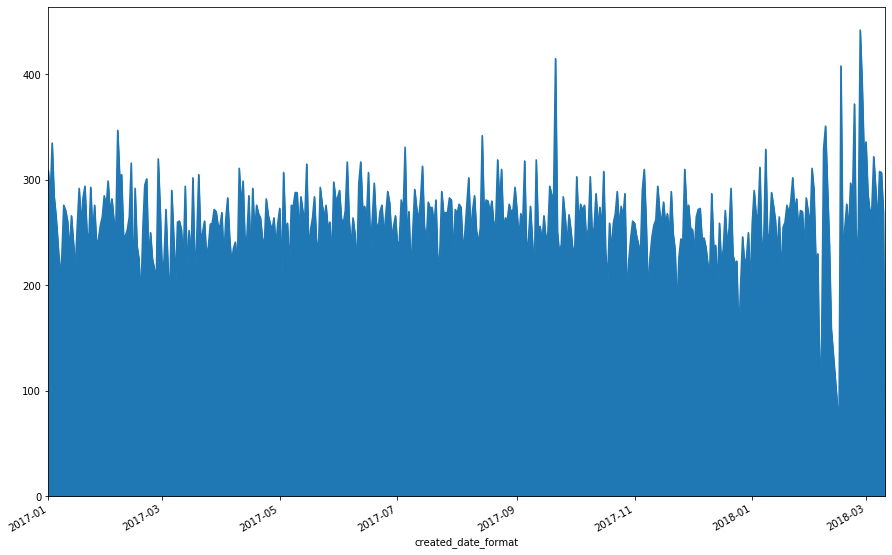

In [112]:
# UCR Counts after 2017-01-01
df_crime_cat[\
             (df_crime_cat['created_date_format']>='2017-01-01T00:00:00')\
             & (df_crime_cat['created_date_format']<='2018-03-11T03:00:00')\
             & (~df_crime_cat[' UCR Code'].isnull())]\
.groupby(df_crime_cat['created_date_format'].dt.normalize())['Service Number ID'].count()\
.plot(kind='area',figsize=(15,10))

In [100]:
df[df['Offense Entered Year']>=2014]\
.groupby('NIBRS Crime Category')['Service Number ID']\
.count()\
.sort_values(ascending=False)

NIBRS Crime Category
MISCELLANEOUS                                 89912
LARCENY/ THEFT OFFENSES                       85342
DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY    34531
ASSAULT OFFENSES                              33171
BURGLARY/ BREAKING & ENTERING                 31157
MOTOR VEHICLE THEFT                           31033
ROBBERY                                       15777
PUBLIC INTOXICATION                           13479
ALL OTHER OFFENSES                            12190
TRAFFIC VIOLATION - HAZARDOUS                 10591
DRUG/ NARCOTIC VIOLATIONS                      7261
FRAUD OFFENSES                                 4868
DRIVING UNDER THE INFLUENCE                    4192
TRESPASS OF REAL PROPERTY                      3569
FAMILY OFFENSES, NONVIOLENT                    2269
COUNTERFEITING / FORGERY                       2197
WEAPON LAW VIOLATIONS                          2185
EMBEZZELMENT                                   1518
TRAFFIC VIOLATION - NON HAZARDOUS          

In [82]:
df.groupby('Offense Entered Year')['Service Number ID'].count()

Offense Entered Year
2014      4302
2015      7186
2016      7231
2017     95000
2018    120286
2019    129874
2020     43871
Name: Service Number ID, dtype: int64

## Explore the Call (911) Problem field

In [69]:
df.groupby('Call (911) Problem')['Service Number ID'].count().sort_values(ascending=False)

Call (911) Problem
58 - ROUTINE INVESTIGATION     51143
09V - UUMV                     35354
11V - BURG MOTOR VEH           35327
6X - MAJOR DIST (VIOLENCE)     30974
11R - BURG OF RES              17932
                               ...  
6F - FIRE WORKS DISTURBANCE        5
PSE/11B - BURG OF BUS              4
6X/01 WOMEN'S SHELTER DIST         3
62 - PUBLIC SERVICE                2
12N - BURGLAR ALARM NONDISP        1
Name: Service Number ID, Length: 114, dtype: int64

## Pull Badge Numbers and Names for Export